In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [7]:
X , y = load_data()

In [8]:
print('The first element of X is:', X[0])

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [10]:
print('The first element of y is:', y[0,0])
print('The last element of y is:', y[-1,0])

The first element of y is: 0
The last element of y is: 1


In [11]:
print('The shape of X is:' + str(X.shape))
print('The shape of y is:' + str(y.shape))

The shape of X is:(1000, 400)
The shape of y is:(1000, 1)


In [12]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

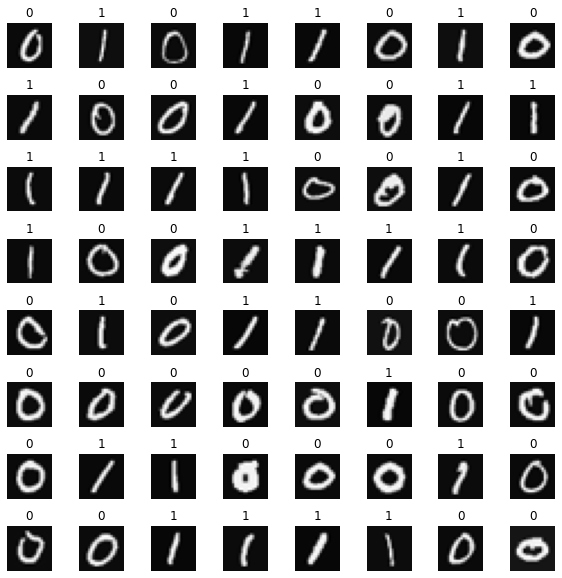

In [16]:
m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [19]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        
        Dense(25,activation='sigmoid'),
        Dense(15,activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ],name = "my_model"
)

In [20]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [22]:
from public_tests import *

test_c1(model)

All tests passed!


In [23]:
L1_num_params = 400*25 + 25
L2_num_params = 25*15 + 15
L3_num_params = 15* 1 + 1
print("L1 params=", L1_num_params, "L2 params = ", L2_num_params, ", L3 params = ",L3_num_params)

L1 params= 10025 L2 params =  390 , L3 params =  16


In [24]:
[layer1, layer2, layer3] = model.layers

In [25]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape={ b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape={ b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape={ b3.shape}")

W1 shape = (400, 25), b1 shape=(25,)
W2 shape = (25, 15), b2 shape=(15,)
W3 shape = (15, 1), b3 shape=(1,)


In [26]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.11530793],
       [ 0.41413206],
       [-0.27633926],
       [-0.14032868],
       [ 0.34240848],
       [ 0.58536345],
       [ 0.04525185],
       [ 0.06999415],
       [ 0.2329368 ],
       [-0.27099913],
       [-0.5385113 ],
       [-0.09534639],
       [-0.18682298],
       [-0.57711893],
       [-0.1310972 ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [29]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs =20
)

Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6098
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4500
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3136
Epoch 4/20
32/32 [==============================] - 0s 969us/step - loss: 0.2217
Epoch 5/20
32/32 [==============================] - 0s 990us/step - loss: 0.1647
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1281
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0849
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0714
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 11/20
32/32 [==============================] - 0s 961us/step - loss: 0.0529
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 13/20
32/32 [========================

In [30]:
prediction = model.predict(X[0].reshape(1,400))
print(f" predicting a zero: { prediction}")
prediction = model.predict(X[500].reshape(1,400))
print(f" predicting a one: { prediction}")

 predicting a zero: [[0.01624364]]
 predicting a one: [[0.9813224]]


In [31]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


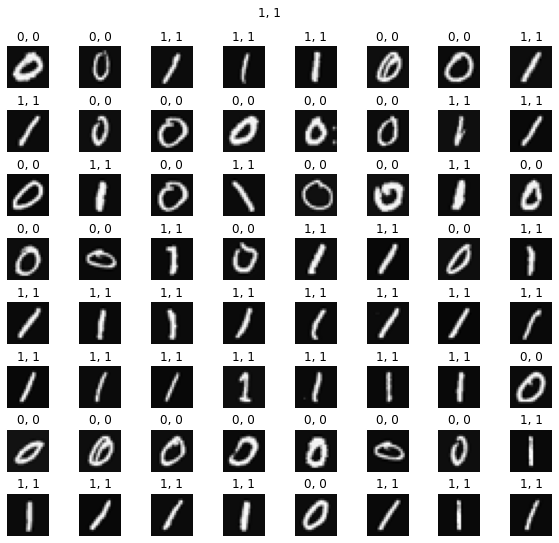

In [35]:
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
m, n =X.shape

fig,axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    prediction = model.predict(X[random_index]. reshape(1,400))
    
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
        
    
    ax.set_title(f"{y[random_index, 0]}, { yhat}")
    ax.set_axis_off()
    
fig.suptitle(f"{y[random_index, 0 ]}, {yhat}")
plt.show()
    
    

## NUMPY MODEL IMPLEMENTATION


In [40]:
def my_dense(a_in, W, b, g):
    
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for j in range(units):
        
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
        
    return(a_out)

In [41]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [42]:
test_c2(my_dense)

All tests passed!


In [43]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [44]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [45]:
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


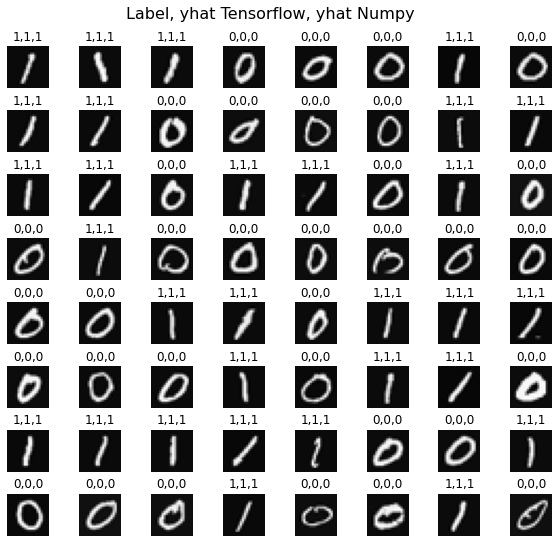

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [47]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


In [48]:
def my_dense_v(A_in, W, b, g):
    
    Z = np.matmul(A_in,W) + b
    A_out = g(Z)
    
    return(A_out)

In [49]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


In [50]:
test_c3(my_dense_v)

All tests passed!


In [51]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [52]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [53]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

In [54]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


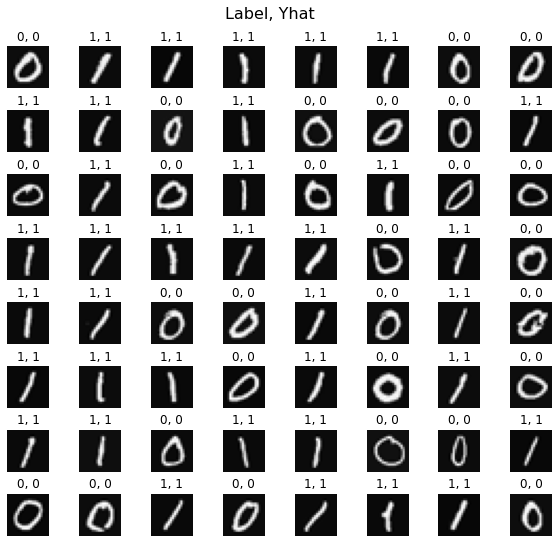

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

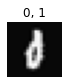

In [56]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

## NUMPY BROADCASTING 

In [57]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


In [58]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

(a * b).shape: (3, 1), 
a * b = 
[[ 5]
 [10]
 [15]]


In [59]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]
